# 다항 회귀 이해
## 단항 회귀
독립 변수(피처)와 종속 변수(타깃)의 관계가 일차 방정식 형태
  
## 다항 회귀
회귀가 독립변수의 단항식이 아닌 2차, 3차 방정식과 같은 다항식으로 표현되는 것을 다항(Polynomial) 회귀라고 한다.  
  
한가지 주의할 점은 다항 회귀를 비선형 회귀로 혼동하기 쉽지만, 다항 회귀는 선형 회귀이다.   
회귀에서 선형 회귀와 비선형 회귀를 나누는 기준은 회귀 계수가 선형/비선형인지에 따르는 것이고    
독립 변수가 선형/비선형 여부와는 상관없다.  
피처 X에 대해 타깃 Y 갓의 관계를 단순 션형회귀 직선형으로 표현한 것보다   
다항 회귀 곡선형으로 표현한 것이 더 예측 성능이 높음  

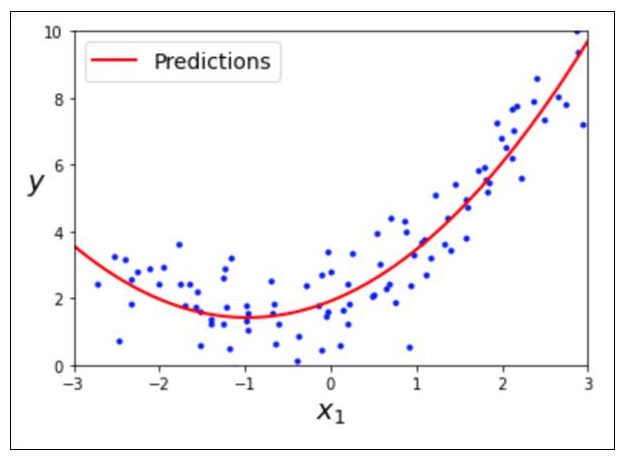

## PolyminalFeatures 클래스로 다항식 변환  
**PolynomialFeatures 클래스**  
PolynomialFeatures 클래스를 통해서 피처를 다항식 피처로 변환  
PolynomialFeatures(degree=2) : 2차 다항식  
fit()/transform() 메서드를 사용해서 변환 작업 수행    
  
PolynomialFeatures 클래스로 다항식 변환  
단항값을 2차 다항값으로 변환하는 예제  

In [1]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 단항식 생성
X = np.arange(6). reshape(3, 2)
print('일차 단항식 계수 feature : \n', X)

# (x1, x2)

일차 단항식 계수 feature : 
 [[0 1]
 [2 3]
 [4 5]]


In [2]:
# PolynomialFeatures를 이용하여
# degree = 2인 2차 다항식으로 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 features : \n', poly_ftr)

# transform from (x1, x2) to (1, x1, x2, x1^2, x1*x2, x2^2)

변환된 2차 다항식 계수 features : 
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]


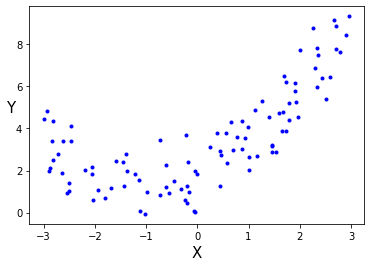

In [3]:
import numpy as np
import matplotlib.pyplot as plt

m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)  # 약간의 노이즈 포함

plt.plot(X, y, "b.")
plt.ylabel("Y", fontsize=15, rotation=0)
plt.xlabel("X", fontsize=15)
plt.show()

**결과**  
그래프 설명  
데이터의 분포가 곡선 형태로 나타남 : 비선형  
일반적인 선형 회귀로는 해결할 수 없음  

In [4]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

print(X[0], X[1])
print(X_poly[0], X_poly[1])

[-2.83960497] [0.92427887]
[-2.83960497  8.06335637] [0.92427887 0.85429143]


include_bias=True : 디폴트  
절편 값으로 1이 추가  
1 + ax + bx   
  
include_bias=False : 절편 값으로 1이 추가되지 않음  

In [5]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.8620475]), array([[0.98214162, 0.48612973]]))

In [6]:
X_new = np.linspace(-3,3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

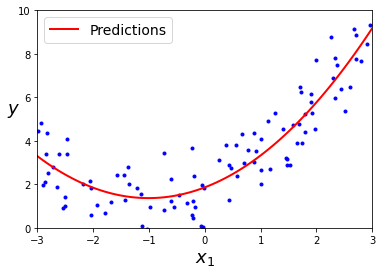

In [7]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# $ : matplotlib 수학적 표현
# a_1 : 아래첨자
# a^1 : 위첨자

## Polynomial_func(X)로 3차 다항식 결정값 구하기

In [8]:
# 3차 다항식 결정값을 구하는 함수 생성 : polynomial_func(X)
def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

X = np.arange(0, 4).reshape(2,2)

print('일차 단항식 계수 feature :\n', X, '\n')
y = polynomial_func(X)
print('삼차 다항식 계수 feature :\n', y, '\n')

# 3차 다항식 변환
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('변환된 삼차 다항식 계수 feature :\n', poly_ftr, '\n')

# LinearRegressio에 3차 다항식 계수 feature와
# 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)

print('Polynomial 회귀 계수 \n', np.round(model.coef_, 2), '\n')
print('Polynomial 회귀 Shape : ', model.coef_.shape)

일차 단항식 계수 feature :
 [[0 1]
 [2 3]] 

삼차 다항식 계수 feature :
 [  5 125] 

변환된 삼차 다항식 계수 feature :
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]] 

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34] 

Polynomial 회귀 Shape :  (10,)


3차 다항식 계수의 피처값과 3차 다항식 결정값으로 학습.  
사이킷런의 파이프라인(Pipeline)을 이용하여 3차 다항 회귀 학습함  
  
일차 단항식 계수 피처는 2개였지만, 3차 다항식 Polynomial 변환 이후에는  
다항식 계수 피처가 10개로 늘어납니다. 이 피처 데이터 세트에  
LinearRegression을 통해 3차 다항 회귀 형태의 다항 회귀를 적용하면 회귀 계수가 10개로 늘어납니다.  
10개의 회귀 계수는 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34] 로 도출됐으며  
원래 다항식의 계수와는 차이가 있지만 다항 회귀로 근사하고 있음을 알 수 있습니다.  
이처럼 사이킷런은 PolynomialFeatures로 피처를 변환한 후에 LinearRegression 클래스로 다항 회귀를 구현합니다.  
  
**사이킷런 Pipeline**  
피처 변환과 선형 회귀 적용을 별도로 하지 않고  
다항 회기를 한 번에 구현 Feature 엔지니어링 변환과 모델 학습/예측을 순차적으로 결합  
바로 이전 예제와 같이 피처 변환과 선형 회귀 적용을 각각 별도로 하는 것보다  
사이킷런의 Pipeline 객체를 이용해 한 번에 다항 회귀를 구현하는 것이 코드를 더 명료하게 작성하는 방법입니다.

## Pipeline 객체를 이용해 코드 명료하게 작성하기

In [9]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3 
    return y

# Pipeline 객체로 PolynomialFeatures 변환과 LinearRegression을 연결
model = Pipeline([('poly', PolynomialFeatures(degree=3)), 
                  ('linear', LinearRegression())])

X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model.fit(X, y)
print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_, 2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


___
# 다항회귀를 이용한 보스턴 주택 가격 예측  
다음은 사이킷런 홈페이지에서 다항 회귀를 이용해 과소적합과 과적합의 문제를 잘 보여주는 예제가 있어 발췌한 것입니다.  

## 라이브러리 임포트, 데이터 셋 로드

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.datasets import load_boston

# boston 데이터 셋 로드
boston = load_boston()

# DataFrame으로 변환
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


In [13]:
# boston.target을 PRICE 칼럼으로 추가
bostonDF['PRICE'] = boston.target
print('Boston 데이터셋 크기 :', bostonDF.shape)

Boston 데이터셋 크기 : (506, 14)


In [14]:
bostonDF.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


## 타깃/피처 데이터 셋트로 분할

In [15]:
y_target = bostonDF['PRICE']  # 타깃 데이터셋
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)  # 피처 데이터셋

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_target, test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression을 순차적으로 결합
(1) degree=2    
(2) degree=2, include_bias=False    
(3) degree=3, include_bias=False  

### 1. degree=2

In [16]:
# (1) degree=2
# 'poly' : 첫 번째 스탭의 이름 (변수명처럼 직접 만듦)
# 'linear' : 두 번째 스탭의 이름 
p_model = Pipeline([('poly', PolynomialFeatures(degree=2)), 
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)

# liner 스탭의 속성 coef_를 반환
print('Polynomial 회귀 계수 \n', np.round(p_model.named_steps['linear'].coef_, 2))

y_preds = p_model.predict(X_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

Polynomial 회귀 계수 
 [ 1.0906374e+09 -8.1400000e+00 -1.0000000e-01 -7.0000000e+00
  3.6980000e+01  2.5363000e+02  3.0970000e+01  1.0900000e+00
 -1.2020000e+01  3.1000000e+00 -6.0000000e-02  7.7500000e+00
  2.0000000e-02  4.6000000e-01 -0.0000000e+00  2.7000000e-01
  6.8000000e-01  1.8600000e+00 -1.2000000e-01  9.0000000e-02
  0.0000000e+00 -2.0000000e-01  5.8000000e-01 -6.0000000e-02
  8.7000000e-01 -0.0000000e+00  4.0000000e-02 -0.0000000e+00
 -2.0000000e-02 -1.7000000e-01 -2.0900000e+00 -2.0000000e-02
  0.0000000e+00 -2.0000000e-02  1.0000000e-02  0.0000000e+00
 -2.0000000e-02  0.0000000e+00 -1.0000000e-02  5.0000000e-02
 -4.9000000e-01 -9.0000000e-02  2.9000000e-01  1.0000000e-02
  2.1000000e-01 -5.0000000e-02  0.0000000e+00 -3.0000000e-02
  1.0000000e-02 -1.0000000e-02  3.6980000e+01 -2.9240000e+01
 -5.9500000e+00 -5.0000000e-02  1.7700000e+00 -2.0000000e-02
  3.0000000e-02 -1.9000000e+00  2.0000000e-02 -1.3000000e-01
 -7.7010000e+01 -5.0600000e+00 -5.1000000e-01  2.2740000e+01
 -4.9

**결과**    
(1) 다항회귀 degree=2 결과  
MSE : 24.282, RMSE : 4.928  
Variance score : 0.659   
  
MSE와 RMSE는 단항 회귀보다 높게 나왔고 Variance score는 약간 작아짐  
   
단항(선형) 회귀 결과  
MSE : 17.297, RMSE : 4.159  
Variance score : 0.757  
  
RMSE는 작을수록 Variance score는 1에 가까울수록 예측 정확도가 높음

### 2. degree=2, include_bias=False

In [17]:
# (2) degree=2, include_bias=False 튜닝

p_model = Pipeline([('poly', PolynomialFeatures(degree=2, include_bias=False)), 
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 15.556, RMSE : 3.944
Variance score : 0.782


**결과**   
degree=2, include_bias=False 튜닝 결과  
MSE : 15.556, RMSE : 3.944  
Variance score : 0.782  
  
전반적으로 수치 좋아짐  
  
degree=2 결과  
MSE : 24.282, RMSE : 4.928  
Variance score : 0.659  

### 3. degree=3, include_bias=False

In [18]:
# (3) degree=3, include_bias=False

p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)), 
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f}, RMSE : {1:.3f}'.format(mse, rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

MSE : 79625.593, RMSE : 282.180
Variance score : -1116.598


MSE, RMSE가 급격히 상승하면서 오버피팅이 발생했음  
MSE : 79625.593, RMSE : 282.180    
Variance score : -1116.598  
  
다항회귀의 단점 : 오버피팅이 발생하기 쉽다  

## 다항식 변환 후 피처 수 확인

In [19]:
# 다항식에서 degree 크기 주의
# 다항식 변환 후 피처 수 확인
X_train_poly = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 104), (354, 13))

**결과**    
1차 다항식인 경우 X_train의 피처수 : 13  
2차 다항식 변환 후 : 피처 수 104개로 늘어남  
  
다항식 값이 높아질수로고 오버피팅을 급격하게 진행하고 오차가 늘어나게 됨  
다항식 변환을 해서 사용할 때는 degree에 대해 주의를 해야 함  

In [20]:
# 3차 다항식 변환 후 : 피처 수 559개로 늘어남

X_train_poly = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train, y_train)
X_train_poly.shape, X_train.shape

((354, 559), (354, 13))

## Polynomial Regression을 이용한 Underfitting, Overfitting 이해
다항 회귀를 이용한 과속적합 및 과(대)적합 이행  
다항 회귀는 피처의 직선적 관계가 아닌 복잡한 다항 관래를 모델링할 수 있지만  
다항 회귀의 차수를 높일수록 학습 데이터에만 너무 맞춰진 학습이 이루어져 과적합 문제 발생  
  
다항 회기 차수를 변화시키면서 예측 곡선과 예측 정확도 비교 예제  
  
학습 데이터  
- X : 30개의 임의의 데이터. 피처  
- y : X의 코사인 값에서 약간의 노이즈 변동 값을 더한 타깃 값  

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
%matplotlib inline

# random 값으로 구성된 X값에 대해 Cosine 변환값을 반환. 
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0 부터 1까지 30개의 random 값을 순서대로 sampling 한 데이타 
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 cosine 기반의 true_fun() 에서 약간의 Noise 변동값을 더한 값
y = true_fun(X) + np.random.randn(n_samples) * 0.1

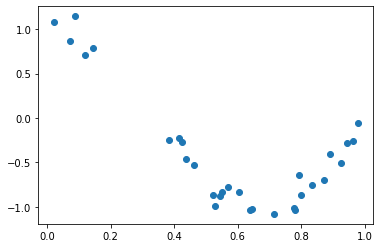

In [22]:
# 그래프로 표시
plt.scatter(X, y)

이제 예측 결과를 비교할 다항식 차수를 각각 1, 4, 15로 변경하면서 예측 결과를 비교하겠습니다.  
다항식 차수별로 학습을 수행한 뒤 cress_val_score()로 MSE 값을 구해 차수별 예측 성능을 평가합니다.  
그리고 0부터 1까지 균일하게 구성된 100개의 테스트용 데이터 세트를 이용해 차수별 회귀 예측 곡선을 그려보겠습니다.


Degree 1 회귀 계수는 [-2.] 입니다.
Degree 1 MSE 는 0.41 입니다.

Degree 4 회귀 계수는 [  0. -18.  24.  -7.] 입니다.
Degree 4 MSE 는 0.04 입니다.

Degree 15 회귀 계수는 [-2.98300000e+03  1.03900000e+05 -1.87417300e+06  2.03717520e+07
 -1.44874234e+08  7.09320168e+08 -2.47067524e+09  6.24565587e+09
 -1.15677381e+10  1.56896159e+10 -1.54007266e+10  1.06458152e+10
 -4.91381762e+09  1.35920853e+09 -1.70382347e+08] 입니다.
Degree 15 MSE 는 181777900.40 입니다.


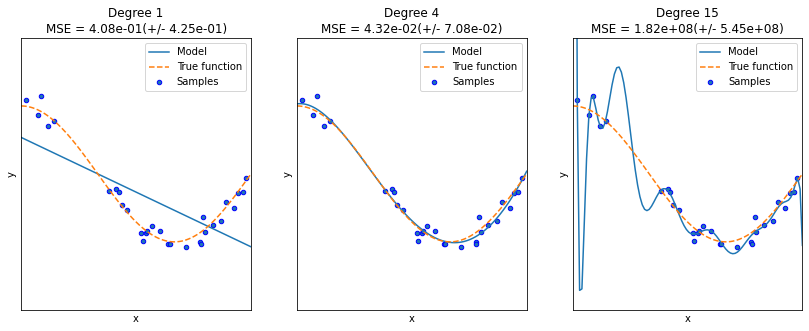

In [23]:
# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 예측 결과 비교
# 차수별 회귀 에측 곡선 표시

plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

for i in range(len(degrees)):   
   
    # 개별 degree별로 Polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀 평가
    # 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균 (cv=10)
    scores = cross_val_score(pipeline, X.reshape(-1,1), y,scoring="neg_mean_squared_error", cv=10)
    coefficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients),2))
    print('Degree {0} MSE 는 {1:.2f} 입니다.'.format(degrees[i] , -1*np.mean(scores)))
    
    # 그래프로 표시
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=()) # setp() : 프로퍼티 설정
    
    # 0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측 
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선 비교 
    X_test = np.linspace(0, 1, 100)
    
    # 예측값 곡선 : 다항 회귀 예측 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model") 
    # 실제 값 곡선 : 실제 데이터 세트 X, y의 코사인 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    # 학습 데이터 
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))  

plt.show()

**결과**  
학습 데이터  
X : 0~1 까지 30개의 임의의 값  
y : X값에 따른 코사인 값에 노이즈를 변동값으로 추가해서 구성  
MSE 평가 : 학습 데이터를 10개의 교차 검증 세트로 나누어 측정해서 평균한 값 (cv=10)  
  
- **왼쪽 그래프 : degree=1 예측 곡선**  
단순 선형 회귀와 동일  
실제 데이터 세트인 코사인 데이터 세트를 직선으로 예측하기에는 부적합  
예측 곡선이 학습 데이터의 패턴을 제대로 반영하지 못한 과소적합 모델  
MSE : 0.41  
    
    
- **가운데 그래프 : degree=4 예측 곡선**  
예측 곡선이 실제 데이터 세트와 유사  
변동하는 노이즈까지 완벽히 예측하지는 못했지만 학습 데이터 세트를 비교적 잘 반영해서  
코사인 곡선 기반으로 테스트 데이터를 잘 예측한 곡선을 가진 모델  
MSE : 0.04(가장 뛰어난 예측 성능을 나타냄)  
      
      
- **오른쪽 그래프 : degree=15인 예측 곡선**  
MSE 값이 182581084.83로 상당히 높은 수치의 오류값 발생  
과적합을 확인하기 위해 dgree를 매우 높은 15차수로 설정한 결과  
데이터 세트의 변동 노이즈까지 지나치게 반영한 결과로  
예측 곡선이 학습 데이터 세트만 정확하게 예측하고  
테스트 값의 실제 곡선과는 완전히 다른 형태의 예측 곡선이 만들어짐  
결과적 학습 데이터에 너무 충실하게 맞춘 과적합이 심함 모델이 되었고  
어이 없는 수준의 높은 MSE 값이 산출되었음   
degree 15라는 아주 복잡한 다항식을 만족하기 위해 계산왼 회귀 계수는  
결국 현실과 너무 동떨어진 예측 결과 보임  
   
결론  
좋은 예측 모델이란?  
degree 1과 같이 학습 데이터의 패턴을 지나치게 단순화한 과소적합 모델도 아니고  
degree 15과 같이 모든 학습 데이터의 패턴을 하나하나 감안한 지나치게 복잡한 과적합 모델도 아닌  
학습 데이터의 패턴을 잘 반영하면서도 복잡하지 않은 균형 잡힌 모델  

___
# 편향-분산 트레이드 오프
편향-분산 트레이드 오프 (Bias-Variance Trade off)

편향이란 한 방향으로 치우치는 것 (정확한 결과에 집중 또는 벗어나는 것)  
분산이란 분포도임  
      
**앞의 degree 1 모델**  
매우 단순화된 모델, 지나치게 한 방향성으로 치우친 경향, 고편향성  

**degree 15 모델**  
학습 데이터 하나하나의 특서을 반영하면서 매우 복잡한 모델  
변동성이 심함, 고분산성  

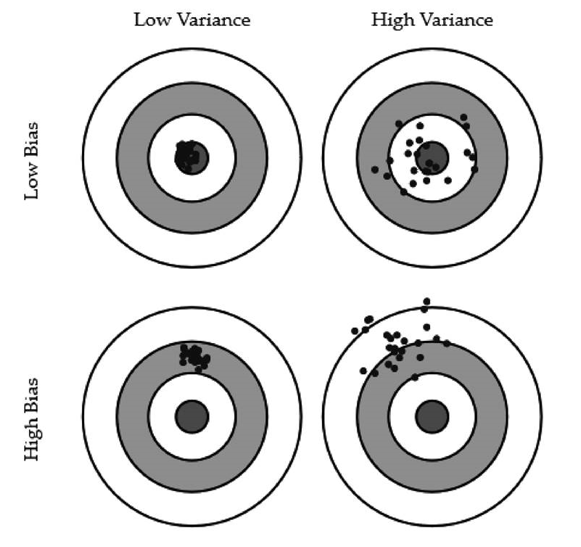

(1) 상단 왼쪽 : 저편향/저분산 (Low/Low)
- 예측 결가가 실제 결과에 매우 잘 근접하면서도 예측 변동이 크지 않고 (저편향)
- 특정 부분에 집중되어 있는 아주 뛰어난 성능 (저분산)
- 아주 드물게 좋은 경우

(2) 상단 오른쪽 : 저편향/고분산 (Low/High) 
- 예측 결과가 실제 결과에 비교적 근접하지만 (저편향)
- 예측 결과 실제 결과를 중심으로 꽤 넓은 부분에 분포되어 있음 (고분산)
- 과적합

(3) 하단 왼쪽 : 고편향/저분산 (High/Low)
- 정확한 결과에서 벗어나면서도 (고편향)
- 예측이 특정 부분에 집중되어 있음 (저분산)
- 과소적합

(4) 하단 오른쪽 : 고편향/고분산 (High/High)
- 예측 결과를 벗어나면서고 (고편향)
- 넓은 부분에 분포 (고분산)

**편향-분산 트레이드 오프**   
머신러닝이 극복해야 할 가장 중요한 이슈 중의 하나  
일반적으로 편향과 분산은 한 쪽이 높으면 한 쪽이 낮아지는 경향이 있음  
즉, 편향이 높으면 분산이 낮아지고 (과소적합)  
반대로 분산이 높으면 편향이 낮아짐 (과적합)  
  
**편향과 분산의 관계에 따른 전체 오류값의 변화**    
편향이 너무 높으면 전체 오류가 높음  
편향을 낮추면 동시에 분산이 높아지고 전체 오류도 낮아지게 됨  
골디락스 지점 : 편향을 낮추고 분산을 높이면서 전체 오류가 낮아지는 지점  
골디락스 지점을 통과하면서 분산을 지속적으로 높이면  
전체 오류값이 오히려 증가하면서 예측 성능이 다시 저하됨  
  
**편향-분산 트레이드 오프 고려한 예측 모델**    
고편향/저분산 : 과속적합  
저편향/고분산 : 과적합  
편향과 분산이 서로 트레이드 오프를 이루면서  
오류 Cost 값이 최대로 낮아지는 모델을 구축하는 것이  
가장 효율적인 머신러닝 예측 모델을 만든 방법  

___
# 규제 선형 모델 - 릿지, 라쏘, 엘라스틱넷
Regularized Linear Models - Ridge, Lasso, Elastic Net  
  
**앞의 예제**  
degree 1 : 너무 단순. 과속적합 모델  
degree 15 : 너무 복잡, 회귀계수가 크게 설정 , 예측 성능도 아주 나쁨  
결론 : 회귀 모델은 적절히 데이터에 적합하면서도   
회귀 계수가 기하급수적으로 커지는 것을 제어할 수 있어야 함  
    
**선형 모델의 비용 함수**  
RSS 최소화 : 실제값과 예측값의 차이를 최소화  
RSS를 최소하는 것만 고려하면 과적합되고 회귀 계수가 쉽게 커지고  
이에 따라서 변동성이 심해져서 예측 성능이 저하되기 쉬움  
따라서 RSS 최소화 방법과 과적합 방지를 위해  
회귀 계수값이 커지지 않도록 하는 균형적인 방법 필요  
  
최적 모델을 위한 비용 함수 구성요소 = 학습 데이터 자차 오류 최소화 + 회귀 계수 크기 제어  
  
-> 학습 데이터 정도와 회귀 계수 값의 크기 제얼ㄹ 수행하는 튜닝 파리미터 사용 (alpha)
  
- alpha : 학습 데이터 정도와 회귀 계수 값의 크기 제어를 수행하는 튜닝 파리미터  
- W : 회기 계수

**규제**  
비용함수에 alpha 값으로 패널티를 부여해서  
회귀 곗수 값의 크기를 감소시켜 과적합을 개선하는 방식  
L2 방식과 L1 방식  
  
**L2 규제 (릿지)**  
W의 제곱에 대해 패널티를 부여하는 방식  
회귀 계수의 크기 감소  
L2 규제를 적용한 회귀 : 릿지(Redge) 방식  
      
**L1 규제 (라쏘)**  
W의 절대값에 대해 패널티를 부여하는 방식  
영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거  
적절한 피처만 회귀에 포함시키는 피선 선택의 특성  
L1 규제를 적용한 회귀 : 라쏘(Lasso) 회귀  
      
**Elastic Net** : L2, L1 규제를 함께 결합한 모델  
주로 피처가 많은 데이터 세트에서 적용  
L1 규제로 피처의 개수를 줄임과 동시에  
L2 규제로 계수 값의 크기 조정  


## 릿지(Ridge) 회귀 구현
사이킷런의 Ridge 클래스 사용해서 릿지 회귀 구현    
주요 생성 파라미터는 alpha: alpha L2 규제 계수에 해당  

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [9]:
# 앞의 LinearRegression예제에서 분할한 feature 데이터 셋인 X_data과 Target 데이터 셋인 Y_target 데이터셋을 그대로 이용 

from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


ridge = Ridge(alpha = 10) ##릿지 !!
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
rmse_scores  = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores: ', np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores,3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

Boston 데이타셋 크기 : (506, 14)
 5 folds 의 개별 Negative MSE scores:  [-11.422 -24.294 -28.144 -74.599 -28.517]
 5 folds 의 개별 RMSE scores :  [3.38  4.929 5.305 8.637 5.34 ]
 5 folds 의 평균 RMSE : 5.518 


### alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정

In [22]:
# Ridge에 사용될 alpha 파라미터의 값들을 정의
alphas = [0 , 0.1 , 1 , 10 , 100]

# alphas list 값을 iteration하면서 alpha에 따른 평균 rmse 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)
    #cross_val_score를 이용하여 5 fold의 평균 RMSE 계산
    neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
    print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f} '.format(alpha,avg_rmse))

alpha 0 일 때 5 folds 의 평균 RMSE : 5.829 
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788 
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653 
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518 
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330 


### 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

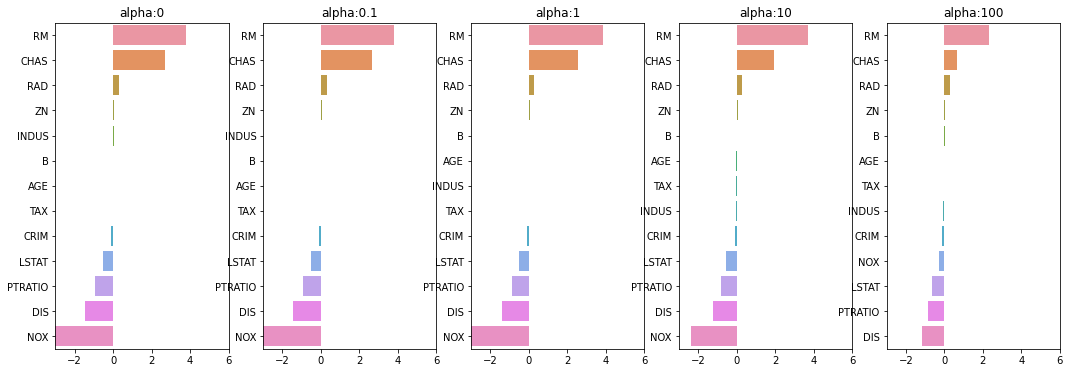

In [11]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

### alpha 값에 따른 컬럼별 회귀계수 출력¶

In [12]:
# alpha 값에 다른 칼럼별 회귀 계수 출력
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha:'+str(ridge_alphas[0])
coeff_df.sort_values(by=sort_column, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.809865,3.818233,3.854000,3.702272,2.334536
CHAS,2.686734,2.670019,2.552393,1.952021,0.638335
RAD,0.306049,0.303515,0.290142,0.279596,0.315358
ZN,0.046420,0.046572,0.047443,0.049579,0.054496
INDUS,0.020559,0.015999,-0.008805,-0.042962,-0.052826
B,0.009312,0.009368,0.009673,0.010037,0.009393
AGE,0.000692,-0.000269,-0.005415,-0.010707,0.001212
TAX,-0.012335,-0.012421,-0.012912,-0.013993,-0.015856
CRIM,-0.108011,-0.107474,-0.104595,-0.101435,-0.102202
LSTAT,-0.524758,-0.525966,-0.533343,-0.559366,-0.660764


**결과**  
alpha 커지면서 RM값이 작아짐  
NOX는 가장 크게 줄어듦  
예측 성능이 좋을 수 있는 이유는 NOX값의 회귀 계수 값을 상당히 적절한 수준으로  
맞춰 들어가서 

## 라쏘 (Lasso)
W (회귀 계수)의 절대값에 패널티를 부여하는 L1규제를 선형회귀 적용한 것
영향력이 크지 않은 회귀 계수를 0으로 변환하고 제거  
적절한 피처만 회귀에 포함시키는 피처 선택의 특성  
  
사이킷런의 Lasso 클래스를 이용해서 라쏘 회귀 구현  
주요 생성 파라미터 alpha : 라쏘 회귀의 alpha L1 규제 계수 해당  
  
L2규제가 회귀 계수의 크기를 감소시키는데 반해,  
L1규제는 불필요한 회귀 계수를 급격하게 감소시켜 0으로 만들고 제거  
그래서 feature selection의 특성을 가지고 있음.  

### alpha값을 0 , 0.1 , 1 , 10 , 100 으로 변경하면서 RMSE 측정

In [14]:
# 라쏘 회귀 예제 : 라쏘의 alpha 값을 변화시키면서 RMSE와 각 피처를 출력

from sklearn.linear_model import Lasso, ElasticNet

# 뒤에 ElasticNet에서도 사용할 수 있도록 함수로 작성
# alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고
# 회귀 계수값들을 DataFrame으로 반환 
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, verbose=True):
    coeff_df = pd.DataFrame()
    if verbose : print('####### ', model_name , '#######') # Log 출력
        
    for param in params:  # alpha 값 변화
        # 모델 별 해당 클래스 객체 생성
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        
        # 교차 검증 수행
        neg_mse_scores = cross_val_score(model, X_data_n, 
                                             y_target_n, scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE: {1:.3f} '.format(param, avg_rmse))
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        
        model.fit(X_data , y_target)
        
        # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가. 
        coeff = pd.Series(data=model.coef_ , index=X_data.columns )
        colname='alpha:'+str(param)
        coeff_df[colname] = coeff
    return coeff_df

### alpha값을 변경하면서 RMSE 측정

In [16]:
# 라쏘 모델 기반으로 수행
# 라쏘에 사용될 alpha 파라미터의 값들을 정의하고
# get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas, X_data_n=X_data, y_target_n=y_target)

#######  Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.612 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.615 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.669 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.776 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.189 


**결과**  
라쏘 : alpha가 0.07일 때 가장 좋은 평균 RMSE 5.612를 보임  
  
앞서 구한 릿지 결과를 가져와 보자  
> alpha 0 일 때 5 folds 의 평균 RMSE : 5.829   
alpha 0.1 일 때 5 folds 의 평균 RMSE : 5.788   
alpha 1 일 때 5 folds 의 평균 RMSE : 5.653   
alpha 10 일 때 5 folds 의 평균 RMSE : 5.518   
alpha 100 일 때 5 folds 의 평균 RMSE : 5.330   
  
릿지가 가장 좋은 수치는 5.330    
라쏘가 가장 좋은 수치는 5.612    
LinearRegression 수치는 5.829  

두 개 결과만 보고 비교했을 땐 라쏘가 릿지보다 조금 떨어지는 수치이지만  
LinearRegression 보다는 향상  

### 각 alpha에 따른 회귀 계수 값을 시각화. 각 alpha값 별로 plt.subplots로 맷플롯립 축 생성

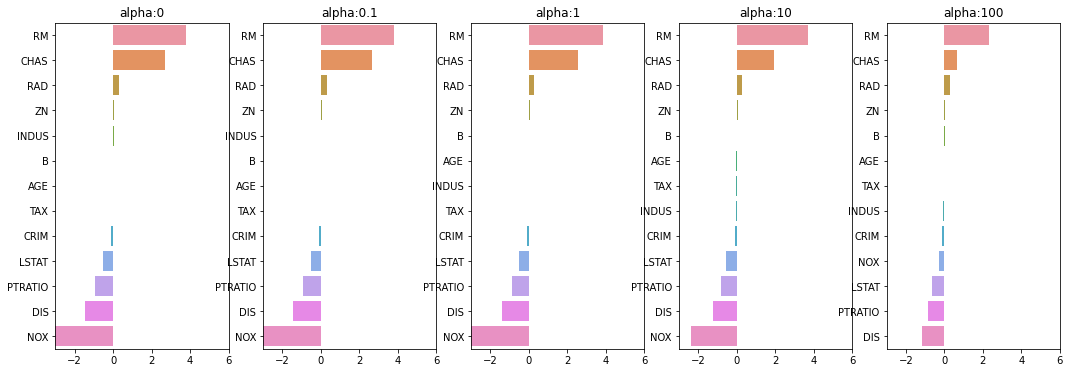

In [18]:
# 각 alpha에 따른 회귀 계수 값을 시각화하기 위해 5개의 열로 된 맷플롯립 축 생성  
fig , axs = plt.subplots(figsize=(18,6) , nrows=1 , ncols=5)
# 각 alpha에 따른 회귀 계수 값을 데이터로 저장하기 위한 DataFrame 생성  
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀 계수 값 시각화 및 데이터 저장. pos는 axis의 위치 지정
for pos , alpha in enumerate(alphas) :
    ridge = Ridge(alpha = alpha)
    ridge.fit(X_data , y_target)
    # alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가.  
    coeff = pd.Series(data=ridge.coef_ , index=X_data.columns )
    colname='alpha:'+str(alpha)
    coeff_df[colname] = coeff
    # 막대 그래프로 각 alpha 값에서의 회귀 계수를 시각화. 회귀 계수값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values , y=coeff.index, ax=axs[pos])

# for 문 바깥에서 맷플롯립의 show 호출 및 alpha에 따른 피처별 회귀 계수를 DataFrame으로 표시
plt.show()

### alpha 값에 따른 컬럼별 회귀계수 출력

In [19]:
# 반환된 coeff_lasso_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.789725,3.703202,2.498212,0.949811,0.000000
CHAS,1.434343,0.955190,0.000000,0.000000,0.000000
RAD,0.270936,0.274707,0.277451,0.264206,0.061864
ZN,0.049059,0.049211,0.049544,0.049165,0.037231
B,0.010248,0.010249,0.009469,0.008247,0.006510
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
AGE,-0.011706,-0.010037,0.003604,0.020910,0.042495
TAX,-0.014290,-0.014570,-0.015442,-0.015212,-0.008602
INDUS,-0.042120,-0.036619,-0.005253,-0.000000,-0.000000
CRIM,-0.098193,-0.097894,-0.083289,-0.063437,-0.000000


**결과**  
alpha 값은 크기가 증가함에 따라 일부 피처의 회귀계수는 아예 0으로 변경  
NOX 속성은 alpha가 0.07일 때부터 회귀 계수가 0이고  
alpha 값을 증가시켜서 INDUS, CHAS와 같은 속성의 회귀계수가 0으로 바뀜  
회귀 계수가 0인 피처는 회귀 식에서 제외되면서 피처 선택의 효과를 얻어서 성능이 향상되었음  

## 엘라스틱넷 (Elastic Net) 회귀
급격한 회귀 계수 변동을 완화하기 위해 L2 규제를 라쏘 회귀에 추가한 것  
즉 라쏘의 L1 규제와 릿지의 L2 규제 모두 적용함  
단점으로 수행 시간이 상대적으로 오래 걸림  
사이킷런의 ElasticNet 클래스 사용  
주요 파라미터 : alpha, l1_ration  
ElasticNet 클래스의 alpha는 Ridge와 Lasso 클래스의 alpha 값과 다름  
  
엘라스틱 규제는 aL1 + bL2 로 구성됨  
- a : L1규제의 alpha 값  
- b : L2규제의 alpha 값  
- ElasticNet 클래스의 alpha: a + b  
  
l1_ration : a/(a+b)  
l1_ration가 0이면 a가 0이 되어 L2 규제와 동일함  
l1_ration가 1이면 b가 0이 되어 L1 규제와 동일함

### alpha값을 변경하면서 RMSE 측정

In [20]:
# 엘라스틱넷에 사용될 alpha 파라미터의 값들을 정의하고 get_linear_reg_eval() 함수 호출
# 단순히 alpha값의 변화만 확인하기 위해서 l1_ratio는 0.7로 고정
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

#######  ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE: 5.542 
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.526 
alpha 0.5일 때 5 폴드 세트의 평균 RMSE: 5.467 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.597 
alpha 3일 때 5 폴드 세트의 평균 RMSE: 6.068 


**결과**   
aphpa 0.5일 때 RMSE가 5.467 로 가장 좋은 예측 성능을 보임  
  
릿지가 가장 좋은 수치 : 5.330  
라쏘가 가장 좋은 수치 : 5.612  
엘라스틱 넷 가장 좋은 수치 : 5.467  
LinearRegression 수치는 5.829  
  
엘라스틱넷이 릿지보다 낮지만 라쏘보다는 좋은 수치를 보임  

### alpha 값에 따른 컬럼별 회귀계수 출력

In [23]:
# 반환된 coeff_elastic_df를 첫번째 컬럼순으로 내림차순 정렬하여 회귀계수 DataFrame출력
sort_column = 'alpha:'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.574162,3.414154,1.918419,0.938789,0.000000
CHAS,1.330724,0.979706,0.000000,0.000000,0.000000
RAD,0.278880,0.283443,0.300761,0.289299,0.146846
ZN,0.050107,0.050617,0.052878,0.052136,0.038268
B,0.010122,0.010067,0.009114,0.008320,0.007020
AGE,-0.010116,-0.008276,0.007760,0.020348,0.043446
TAX,-0.014522,-0.014814,-0.016046,-0.016218,-0.011417
INDUS,-0.044855,-0.042719,-0.023252,-0.000000,-0.000000
CRIM,-0.099468,-0.099213,-0.089070,-0.073577,-0.019058
NOX,-0.175072,-0.000000,-0.000000,-0.000000,-0.000000


**결과**  
alpha 값에 따른 피처들의 회귀 계수 값들이  
라쏘보다는 상대적으로 0이 되는 값이 적음을 알 수 있음  

# 선형 회귀 모델을 위한 데이터 변환

**선형 회귀 모델을 위한 데이터 변환**  
일반적으로 중요 피처들이나 타깃값의 분포도가  
심하게 왜곡되었을 경우에 스케일링/정규화 등의 변환 작업 필요  
  
**선형 회귀 모델과 같은 선형 모델에서의 데이터 변환**  
일반적으로 피처와 타깃값 간에 선형의 관계가 있다고 가정하고  
최적의 선형 함수를 찾아내 결과값을 예측  
피처값과 타깃값을 분포가 정규분포 형태 선호  
특히, 타깃값의 경우 특정값의 분포가 치우친 왜곡된 형태의 분포일 경우  
예측 성능에 부정적인 영향을 미칠 가능성이 높음  
피처값 역시 결정값보다는 덜하지만 왜곡된 분포도로 인해 예측 성능에 부정적인 영향을 미칠 수 있음  
  
따라서 선형 회귀 모델을 적용하기 전에 먼저 데이터에 대한 스케일링/정규화 작섭을 선행한다고 해서 무조건 예측 선능이 향상되는 것은 아님  
일반적으로 주요 피처들이나 타깃값의 분포도가 심하게 돼곡됐을 경우에 스케일링/정규화 등의 변환 작업 수행  

## 스케일링/정규화 작업 수행 방법 
일반적으로 피처 데이터 셋과 타깃 데이터 셋에 다른 방법 적용  
  
1. 사이킷런을 이용해 피처 데이터 셋에 적용하는 변환 작업
- 방법1 : 스케일링/정규화 수행  
Standard 클래스를 수행해서 평균이 0, 분산이 1인 표준 정규분포를 가진 데이터 세트로 변환  
또는 MinMasScaler 클래스를 이용해서 최소값이 0이고, 최대값이 1인 값을 정규화 수행
  
  
- 방법2 : 스케일링/정규화를 수행한 데이터 셋에 다시 다항 특성을 적용하여 변환  
보통 방법1을 수행했는데 예측 성능에 향상이 없을 경우 적용  
  
  
- 방법3 : 로그 변환  
원래 값에 log 함수를 적용하면 정규분포에 가까운 형태로 값이 분포됨  
매우 유용한 변환으로 실제 선형 회귀에서 훨씬 많이 사용됨  
방법 1, 2 보다 많이 사용하는 이유는 방법 1의 경우 예측 성능을 크게 기대하기 어려운 경우가 많고 방법 2의 경우는 피처 수가 많을 경우에 다항 변환으로 생성되는 피처 수가 기하급수적으로 늘어가서 과적합 발생할 수 있음  
  
   
2. 타깃 값의 경우 : 로그 변환 적용  
왜곡된 분포도 현태의 타깃값을 로그 변환하여 예측 성능이 향상된 경우가 많은 사례로 검증되었고 결정값을 정규 분포나 다른 정규값으로 변환하면 변환된 값을 다시 원본 타깃값으로 원복하기 어려울 수 있기 때문에 일반적으로 로그 변환 적용

## 선형 회귀 모델을 위한 데이터 변환 예제
보스턴 주택가격 피처 데이터 세트에 표준 정규 분포 변환, 최대 값/최소값 정규화,  
로그 변환을 차례로 적용한 후 RMSE로 각 경우별 예측 성능 측정  
로그 변환에서 np.log() 적용하면 언더 플로우가 발생하기 쉬워서  
1 + log() 함수를 구현한 np.lig1p() 함수 사용

In [24]:
y_target.shape

(506,)

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <BarContainer object of 10 artists>)

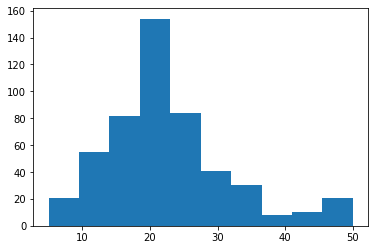

In [25]:
plt.hist(y_target, bins=10)

#### 데이터 변환 함수 생성

In [27]:
# 데이터 변환 함수 생성
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

# method는 표준 정규 분포 변환(Standard), 최대값/최소값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다향식 특성을 추가할 때 적용. p_degree는 2이상 부여하지 않음. 
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log':
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data

    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, 
                                         include_bias=False).fit_transform(scaled_data)
    
    return scaled_data

#### Ridge 클래스의 alpha 값을 변화시키면서 RMSE 값이 어떻게 변하는지 확인
Ridge 클래스의 alpha 값을 변화시키면서 피처 데이터 세트를 여러 가지 방법으로 변화된 데이터 세트를 입력 받을 경우 RMSE 값이 어떻게 변하는지 확인  
  
피처 데이터 변환 방법 6개  
(1) 변환 없는 원본 데이터   
(2) 표준 정규 분포  
(3) 표준 정규 분포를 다시 2차 다항식 변환   
(4) 최소값/최대값 정규화    
(5) 최소값/최대값 정규화를 다시 2차 다항식 변환  
(6) 로그 변환

In [28]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환방법에 따른 RMSE 추출. 
alphas = [0.1, 1, 10, 100]
#변환 방법은 모두 6개, 원본 그대로, 표준정규분포, 표준정규분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규화+다항식 특성, 로그변환 
scale_methods=[(None, None), ('Standard', None), ('Standard', 2), 
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0], p_degree=scale_method[1], 
                                    input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree:{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled, 
                        y_target_n=y_target, verbose=False)


## 변환 유형:None, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.788 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.653 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.518 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.330 

## 변환 유형:Standard, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.826 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.803 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.637 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 5.421 

## 변환 유형:Standard, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 8.827 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 6.871 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.485 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 4.634 

## 변환 유형:MinMax, Polynomial Degree:None
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.764 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 5.465 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.754 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 7.635 

## 변환 유형:MinMax, Polynomial Degree:2
alpha 0.1일 때 5 폴드 세트의 평균 RMSE: 5.298 
alpha 1일 때 5 폴드 세트의 평균 RMSE: 4.323 
alpha 10일 때 5 폴드 세트의 평균 RMSE: 5.185 
alpha 100일 때 5 폴드 세트의 평균 RMSE: 6.538 

## 변환 유형:Log, Polynomial Degree:None
alpha 0.1일 때 5 폴

**결과**  
로그변환 : alpha 0.1, 1, 10인 경우에 모두 성능 향상  
표준 정규 분포 + 2차 다항식인 경우 alpha 100일 RMSE : 4.634 성능 향상  
최소값/최대값정규 + 2차 다항식인 경우 alpha 1일 때 RMSE : 4.323 성능 향상  
  
표준 정규분포와 최소값/최대값 정규화 변환은 성능 개선 없음  
2차 다항식 변환 시는 성능 향상. 하지만 다항식 변환은 피처 수가 많을 경우  
적용하기 힘들고 데이터 건수가 많아지면 계산에 많은 시간이 소요되어 적용상 한계가 있음  
  
**결론**  
일반적으로 선형회귀를 적용하려면 데이터 세트에  
데이터 값의 분포가 심하게 왜곡되어 있을 경우에  
로그 변환을 적용하는 것이 좋을 결과를 기대할 수 있음  